<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q8_pima_indians_diabetes_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

Pregnancies,Glucose,BloodPressure,S.txt  sample_data



=== Gaussian Naive Bayes Evaluation ===
Accuracy: 0.6667
F1 Score: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



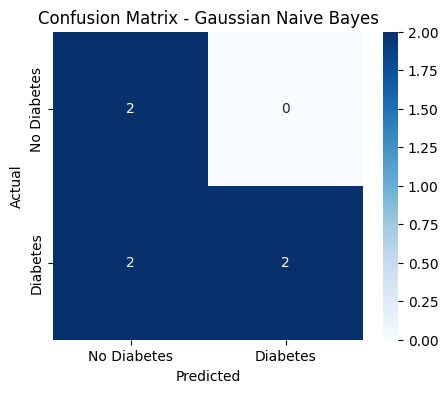


=== Multinomial Naive Bayes Evaluation ===
Accuracy: 0.5
F1 Score: 0.4571

Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



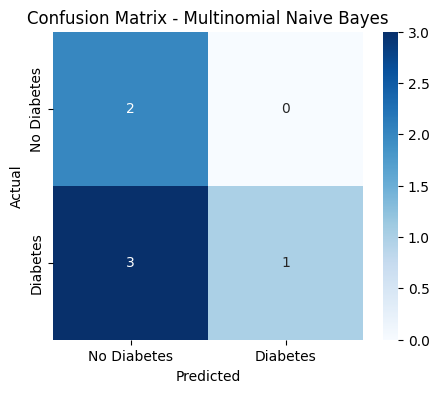

In [4]:
# Naive Bayes for Diabetes Prediction
# Dataset: pima-indians-diabetes.data.csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load Dataset ----------------
data = pd.read_csv("Pregnancies,Glucose,BloodPressure,S.txt")

# Features and Target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------- Feature Scaling for GaussianNB ----------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Gaussian Naive Bayes ----------------
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

# ---------------- Multinomial Naive Bayes ----------------
# Note: MultinomialNB requires non-negative integer-like features
X_train_mnb = np.maximum(X_train, 0)
X_test_mnb = np.maximum(X_test, 0)

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)

# ---------------- Evaluation Function ----------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} Evaluation ===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("F1 Score:", round(classification_report(y_true, y_pred, output_dict=True)['weighted avg']['f1-score'], 4))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate_model("Gaussian Naive Bayes", y_test, y_pred_gnb)
evaluate_model("Multinomial Naive Bayes", y_test, y_pred_mnb)